In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import networkx as nx
import torch_geometric
from torch_geometric.utils import from_networkx
from torch_geometric.data import Data
import matplotlib.pyplot as plt


In [1]:
!pip install numpy
!pip install torch
!pip install networkx
!pip install torch-geometric
!pip install matplotlib

     ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/15.8 MB 1.3 MB/s eta 0:00:13
     - -------------------------------------- 0.4/15.8 MB 4.3 MB/s eta 0:00:04
     -- ------------------------------------- 1.0/15.8 MB 7.0 MB/s eta 0:00:03
     --- ------------------------------------ 1.6/15.8 MB 8.3 MB/s eta 0:00:02
     ----- ---------------------------------- 2.2/15.8 MB 9.2 MB/s eta 0:00:02
     ------- -------------------------------- 3.0/15.8 MB 10.5 MB/s eta 0:00:02
     ---------- ----------------------------- 4.1/15.8 MB 13.0 MB/s eta 0:00:01
     ----------- ---------------------------- 4.6/15.8 MB 12.8 MB/s eta 0:00:01
     ------------- -------------------------- 5.2/15.8 MB 13.3 MB/s eta 0:00:01
     ---------------- ----------------------- 6.4/15.8 MB 14.2 MB/s eta 0:00:01
     ------------------ --------------------- 7.2/15.8 MB 14.4 MB/s eta 0:00:01
     -------------------- ------------------- 8.1/15.


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/198.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/198.6 MB 2.0 MB/s eta 0:01:40
     ---------------------------------------- 0.3/198.6 MB 3.6 MB/s eta 0:00:55
     ---------------------------------------- 0.8/198.6 MB 5.9 MB/s eta 0:00:34
     ---------------------------------------- 1.2/198.6 MB 7.2 MB/s eta 0:00:28
     ---------------------------------------- 1.8/198.6 MB 8.8 MB/s eta 0:00:23
     ---------------------------------------- 2.4/198.6 MB 9.2 MB/s eta 0:00:22
      -------------------------------------- 4.1/198.6 MB 13.0 MB/s eta 0:00:16
      -------------------------------------- 4.9/198.6 MB 13.7 MB/s eta 0:00:15
     - ------------------------------------- 5.5/198.6 MB 13.6 MB/s eta 0:00:15
     - ------------------------------------- 6.5/198.6 MB 14.2 MB/s eta 0:00:14
     - ------------------------------------- 7.4/198.6 MB 15.2 MB/s eta 0:00:13
     - ------------------------------------- 8.


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     -- ------------------------------------- 0.1/1.1 MB 1.7 MB/s eta 0:00:01
     -------- ------------------------------- 0.2/1.1 MB 2.5 MB/s eta 0:00:01
     ------------------------- -------------- 0.7/1.1 MB 4.9 MB/s eta 0:00:01
     ---------------------------------------  1.1/1.1 MB 5.8 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
     ---------------------------------------- 78.3/78.3 kB 4.5 MB/s eta 0:00:00
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
     ---------------------------------------- 0.0/370.7 kB ? eta -:--:--
     --------------------------------- --- 337.9/370.7 kB 10.6 MB/s eta 0:00:01
     -------------------------------------- 370.7/370.7 kB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
     ---------------------


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
     ---------------------------------------- 0.1/7.7 MB 1.3 MB/s eta 0:00:06
     - -------------------------------------- 0.3/7.7 MB 4.3 MB/s eta 0:00:02
     --- ------------------------------------ 0.8/7.7 MB 6.0 MB/s eta 0:00:02
     ------- -------------------------------- 1.4/7.7 MB 8.0 MB/s eta 0:00:01
     ---------- ----------------------------- 2.1/7.7 MB 9.5 MB/s eta 0:00:01
     ------------------- -------------------- 3.7/7.7 MB 14.0 MB/s eta 0:00:01
     ------------------------ --------------- 4.6/7.7 MB 14.7 MB/s eta 0:00:01
     ---------------------------- ----------- 5.4/7.7 MB 15.6 MB/s eta 0:00:01
     -------------------------------- ------- 6.2/7.7 MB 15.2 MB/s eta 0:00:01
     ---------------------------------------  7.5/7.7 MB 16.5 MB/s eta 0:00:01
     ---------------------------------------  7.5/7.7 MB 16.5 MB/s eta 0:00:01
     ---------------------------------------  7.5/7.7 MB 16.5 MB/


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\lolis\Documents\UNI\Kurser\gdl\-RE-POLYGCL\venv\lib\site-packages\torch_geometric\utils\convert.py:278: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:278.)
  data_dict[key] = torch.as_tensor(value)


Data(x=[5000, 2000], edge_index=[2, 22518], block=[5000], partition=[2], name='stochastic_block_model')


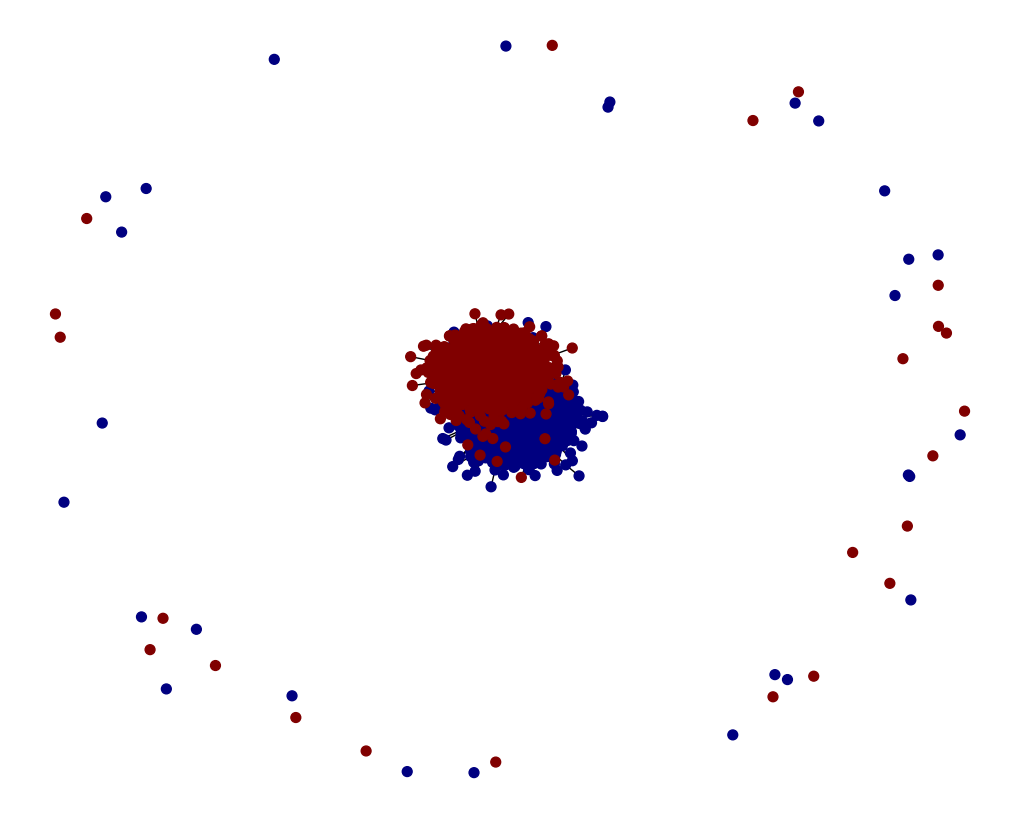

In [2]:
def generate_cSBM(n = 5000, f = 2000, d = 5, l = 2.06, mu = 2.0, censor_fraction=0.1):
    """
    Generate a cSBM dataset.

    Parameters:
    - n: Number of nodes in the graph.
    - f: Number of features for each node.
    - d: Average degree of each node.
    - l: Signal-to-noise ratio.
    - mu: Signal strength.
    - censor_fraction: Fraction of edges to censor.

    Returns:
    - PyTorch Geometric Data object representing the censored graph.
    """
    
    # Generate SBM graph
    nodes_per_community = n // 2
    sizes = [nodes_per_community] * 2
    ksi = n / f
    phi = 2 / np.pi * np.arctan(l * np.sqrt(ksi) / mu)
    p_in = (d + l * np.sqrt(d)) / n
    p_out = (d - l * np.sqrt(d)) / n
    p_matrix = np.ones((2, 2)) * p_out
    np.fill_diagonal(p_matrix, p_in)
    G = nx.stochastic_block_model(sizes, p_matrix)
    
    # Censor edges
    all_edges = list(G.edges())
    np.random.shuffle(all_edges)
    edges_to_remove = all_edges[:int(censor_fraction * len(all_edges))]
    G.remove_edges_from(edges_to_remove)
    
    # Add node features
    for node in G.nodes():
        u = np.random.normal(0, 1 / f, f)
        y = G.nodes[node]['block']
        Z = np.random.normal(0, 1, f)
        G.nodes[node]['x'] = np.sqrt(mu / n) * y * u + Z / np.sqrt(f)
    
    # Convert to PyTorch Geometric format
    data = from_networkx(G)
    
    # Constructing the feature tensor
    node_features = [G.nodes[node]['x'] for node in G.nodes()] # Ensure that the feature vectors are correctly shaped and then stack them
    data.x = torch.tensor(node_features, dtype=torch.float)
    
    return data, G

# Generate cSBM data and the networkx graph
cSBM_data, G = generate_cSBM()
print(cSBM_data)

# Visualization
def visualize_graph(G):
    # Get the community of each node for coloring
    community_map = {node: G.nodes[node]['block'] for node in G.nodes()}
    colors = [community_map[node] for node in G.nodes()]
    
    plt.figure(figsize=(10, 8))
    nx.draw(G, node_color=colors, with_labels=False, node_size=50, cmap=plt.cm.jet)
    plt.show()

visualize_graph(G)

In [3]:
print(cSBM_data.x.shape)

torch.Size([5000, 2000])


In [4]:
from models.discriminator import Discriminator
from models.PolyGCL_model import PolyGCL
from loss import contrastive_loss

In [5]:
torch.cuda.is_available()

True

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

Device: cuda


In [27]:
cSBM_data = cSBM_data.to(device)
edge_index = cSBM_data.edge_index
x = cSBM_data.x
model = PolyGCL(in_size = 2000, hidden_size = 2000, out_size = 2000, K = 10).to(device)
discriminator = Discriminator(2000).to(device)
print(next(model.parameters()).device)
print(edge_index.device)
print(x.device)

cuda:0
cuda:0
cuda:0


In [30]:
# training
optimizer = optim.Adam(model.parameters(), lr=0.1)
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    x_tilde = PolyGCL.get_negative_example(x)
    pos_Z_H, pos_Z_L = model(x, edge_index)
    neg_Z_H, neg_Z_L = model(x_tilde, edge_index)
    g = model.get_global_summary(pos_Z_H, pos_Z_L)
    loss = contrastive_loss(pos_Z_H, neg_Z_H, pos_Z_L, neg_Z_L, g, discriminator)
    loss.backward()
    optimizer.step()
    print('Epoch:', epoch, 'Loss:', loss.item())

torch.Size([2000])
Epoch: 0 Loss: -2.7725884914398193
torch.Size([2000])
Epoch: 1 Loss: -2.7725884914398193
torch.Size([2000])
Epoch: 2 Loss: -2.7725884914398193
torch.Size([2000])
Epoch: 3 Loss: -2.7725884914398193
torch.Size([2000])
Epoch: 4 Loss: -2.7725884914398193
torch.Size([2000])
Epoch: 5 Loss: -2.7725884914398193
torch.Size([2000])
Epoch: 6 Loss: -2.7725884914398193
torch.Size([2000])
Epoch: 7 Loss: -2.7725884914398193
torch.Size([2000])
Epoch: 8 Loss: -2.7725884914398193
torch.Size([2000])
Epoch: 9 Loss: -2.7725884914398193
